In [1]:
# libraries
%matplotlib inline
import linkpred
import matplotlib.pyplot as plt
import networkx as nx
import random
from random import randint

In [2]:
def removeedge(G):
    # list for removed edges
    rem_edges = []   
    
    for edge in G.edges():
        # test set consisnts of 20% of edges; removing randomly
        if random.random() < 0.2: 
            rem_edges.append(edge) 
            
    # remove an edge in initial graph        
    for i in rem_edges:
        G.remove_edge(i[0],i[1])
    # return a list of removed edges    
    return rem_edges

In [3]:
# reading the file
g = nx.read_edgelist("F:\\Study\\Spring19\\Network\\project\\sna_li.csv", delimiter=",", nodetype=int)

# basic information
info = nx.info(g)
print (info)

Name: 
Type: Graph
Number of nodes: 6972
Number of edges: 109426
Average degree:  31.3901


In [5]:
# addition of nodes without edges from initial dataset
#for i in range(0, 10001):
#    if i not in g.nodes():
#        g.add_node(i)

In [4]:
# creation of removed edges
remove = removeedge(g)

In [5]:
# basic information II
info = nx.info(g)
print (info)

Name: 
Type: Graph
Number of nodes: 6972
Number of edges: 87649
Average degree:  25.1431


In [6]:
# length of list with removed edges
print(len(remove), 'edges were removed')

21777 edges were removed


In [7]:
# for evaluation purposes
test_set = set(linkpred.evaluation.Pair(u, v) for u, v in remove)

Neighborhood measures 

In [13]:
#Common Neighbours

# We aim to predict only new links, thus we exclude existing ones
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())
cn_results = cn.predict()

# Computation of accuracy
cor = 0
l = len(remove)
#    .top(2) --> returns the top 2 predicted links based on score
ctop = cn_results.top(len(remove)) 
for i in ctop:
    if i in remove:
        cor = cor + 1
print ("Accuracy: ", cor * 100 / l)
print (cor, 'correctly predicted')

Accuracy:  74.95346620057202
16510 correctly predicted


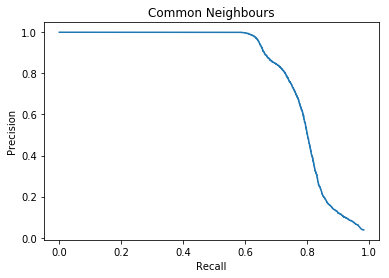

In [14]:
# visualisation of prediction
evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test_set)
plt.title("Common Neighbours")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(evaluation.recall(), evaluation.precision())

In [15]:
#Jaccard
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

# Computation of accuracy
cor = 0
l = len(remove)
#    .top(2) --> returns the top 2 predicted links based on score
jctop = jc_results.top(len(remove)) 
for i in jctop:
    if i in remove:
        cor = cor + 1
print ("Accuracy: ", cor * 100 / l)
print (cor, 'correctly predicted')

Accuracy:  82.88464157624733
18257 correctly predicted


In [1]:
evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test_set)
plt.title("Jaccard")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(evaluation.recall(), evaluation.precision(),'.')

NameError: name 'linkpred' is not defined

In [17]:
#Adamic Adar
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

# Computation of accuracy
cor = 0
l = len(remove)
#    .top(2) --> returns the top 2 predicted links based on score
aatop = aa_results.top(len(remove)) 
for i in aatop:
    if i in remove:
        cor = cor + 1
print ("Accuracy: ", cor * 100 / l)
print (cor, 'correctly predicted')

Accuracy:  81.3229218686158
17913 correctly predicted


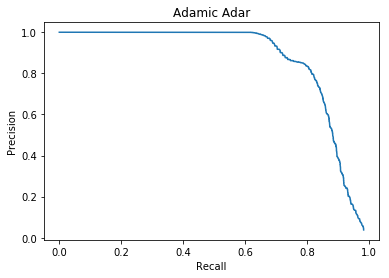

In [18]:
evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test_set)
plt.title("Adamic Adar")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(evaluation.recall(), evaluation.precision())

Path-based measures

In [19]:
#Katz
ka = linkpred.predictors.Katz(g, excluded=g.edges()) 
ka_results = ka.predict()

# Computation of accuracy
cor = 0
l = len(remove)
#    .top(2) --> returns the top 2 predicted links based on score
ktop = ka_results.top(len(remove)) 
for i in ktop:
    if i in remove:
        cor = cor + 1
print ("Accuracy: ", cor * 100 / l)
print (cor, 'correctly predicted')

Computing matrix powers: [############################################################] 5/5
Accuracy:  71.70291006492033
15794 correctly predicted


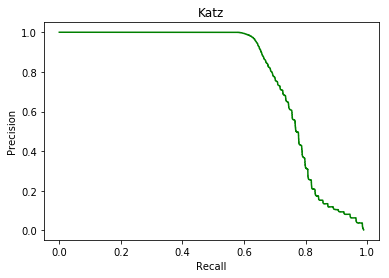

In [20]:
evaluation = linkpred.evaluation.EvaluationSheet(ka_results, test_set)
plt.title("Katz")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(evaluation.recall(), evaluation.precision(), 'g')

Ranking

In [8]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
sr_results = simrank.predict(c=0.5)

# Computation of accuracy
cor = 0
l = len(remove)
#    .top(2) --> returns the top 2 predicted links based on score
srtop = sr_results.top(len(remove)) 
for i in srtop:
    if i in remove:
        cor = cor + 1
print ("Accuracy: ", cor * 100 / l)
print (cor, 'correctly predicted')

Accuracy:  47.802727648436424
10410 correctly predicted


In [ ]:
evaluation = linkpred.evaluation.EvaluationSheet(sr_results, test_set)
plt.title("SimRank")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(evaluation.recall(), evaluation.precision(), 'r')